In [ ]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
import nltk
import spacy
import copy
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

import os

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ignat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


# Import danych

In [5]:
df = pd.read_csv("../data/raw/clean_news.csv")
df.head()

,title,text,date,label
0,Many 'lost' voters say they have found their c...,WASHINGTON/NEW YORK (Reuters) - Ted Wade hasn’...,2016-01-17,0
1,"Iranian Revolutionary Guards commander, anothe...",BEIRUT (Reuters) - A commander in Iran s elite...,2017-11-19,0
2,Cambodian leader gets China's backing as West ...,PHNOM PENH (Reuters) - Cambodian Prime Ministe...,2017-09-04,0
3,Ex-KKK Grand Wizard: Maine Gov. Right To Call...,David Duke is perhaps one of the most notoriou...,2016-01-11,1
4,FINGER-WAGGING GRANNY HILLARY CLINTON Blows Up...,Hillary Clinton shows her true colors here wit...,2016-03-31,1


Dane zawierają artykuły z tytułami, tekstami, datami i etykietami (0 lub 1). Etykieta 0 to artykuły prawdziwe, a 1 to fake newsy. 

# Rozkład klas

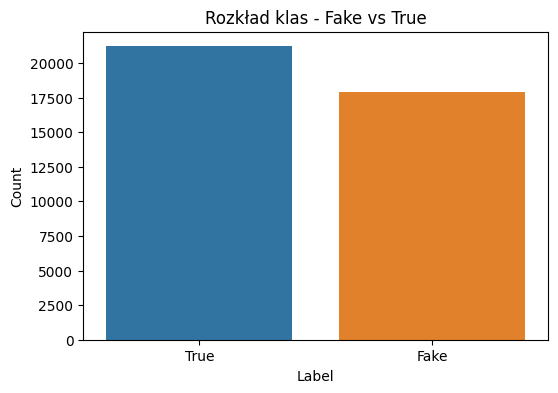

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x = "label",)
plt.title("Rozkład klas - Fake vs True")
plt.xticks([0, 1], ['True', 'Fake'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

W zbiorze danych jest więcej artykułów prawdziwych niż fake newsów, ale nie ma dużej dysproporcji.


# Długość tytułów i tekstów

In [4]:
df['title_length'] = df['title'].apply(len)
df['text_length'] = df['text'].apply(len)

In [5]:
df['title_length'].describe()

count    39105.000000
mean        76.837412
std         22.282635
min          8.000000
25%         62.000000
50%         71.000000
75%         87.000000
max        286.000000
Name: title_length, dtype: float64

In [6]:
df[['title_length','label']].groupby(by='label').mean()

,title_length
label,
0,64.658631
1,91.252960


In [7]:
df['text_length'].describe()

count    39105.000000
mean      2428.043217
std       1943.270658
min          1.000000
25%       1267.000000
50%       2211.000000
75%       3080.000000
max      51794.000000
Name: text_length, dtype: float64

In [8]:
df[['text_length','label']].groupby(by='label').mean()

,text_length
label,
0,2378.697646
1,2486.451642


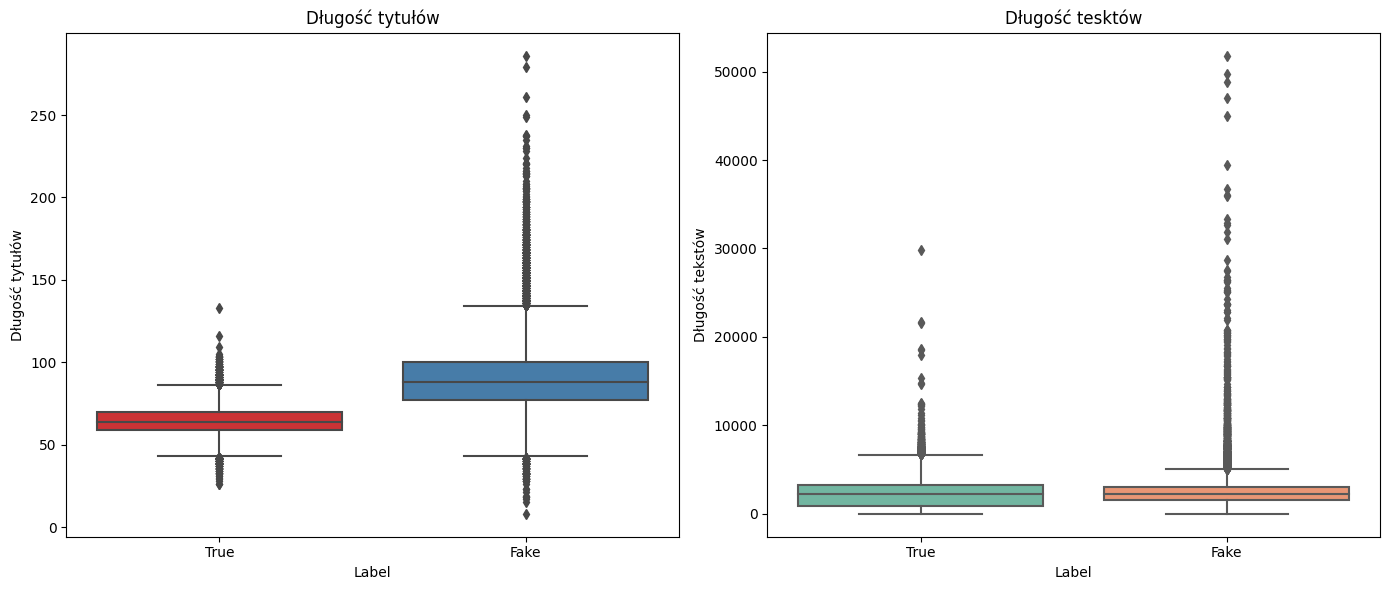

In [9]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(df, x='label', y='title_length', palette='Set1')
plt.title('Długość tytułów')
plt.xticks([0, 1], ['True', 'Fake'])
plt.xlabel('Label')
plt.ylabel('Długość tytułów')

plt.subplot(1,2,2)
sns.boxplot(df, x='label',y='text_length', palette='Set2')
plt.title('Długość tesktów')
plt.xticks([0, 1], ['True', 'Fake'])
plt.xlabel('Label')
plt.ylabel('Długość tekstów')

plt.tight_layout()
plt.show()

1. **Długość tytułów**: Tytuły fake newsów są średnio dłuższe **(91.3)** niż tytuły prawdziwych artykułów **(64.6)**.
2. **Długość tekstów**: Różnica w średniej długości tekstów między fake newsami **(2486.46)** a prawdziwymi artykułami **(2378.7)** jest niewielka.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

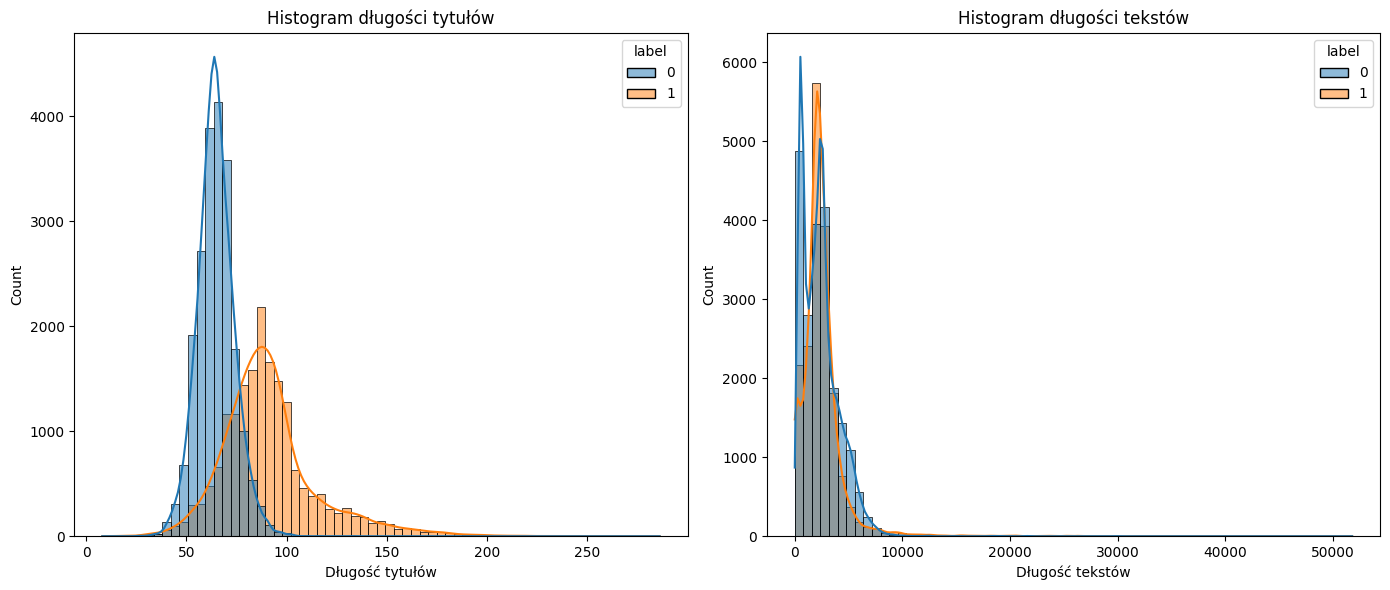

In [10]:
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
sns.histplot(df,x='title_length',hue='label',kde=True, bins=65)
plt.title('Histogram długości tytułów')
plt.xlabel('Długość tytułów')

plt.subplot(1,2,2)
sns.histplot(df,x='text_length',hue='label',kde=True, color='green', bins=65)
plt.title('Histogram długości tekstów')
plt.xlabel('Długość tekstów')

plt.tight_layout()
plt.show()

title           49
text            49
date            49
label           49
title_length    49
text_length     49
dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

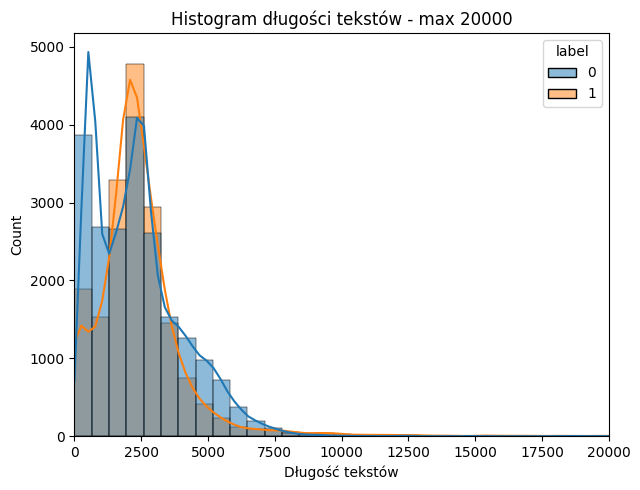

In [11]:
print(df[df['text_length']>20000].count())

plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
sns.histplot(df,x='text_length',hue='label',kde=True, color='green', bins=80)
plt.title('Histogram długości tekstów - max 20000')
plt.xlim((0,20000))
plt.xlabel('Długość tekstów')
plt.tight_layout()
plt.show()

Histogramy potwierdzają, że tytuły fake newsów są średnio dłuższe niż tytuły prawdziwych artykułów, co sugeruje, że **title_length** może być cennym featurem. Długość tekstów nie wykazuje, aż takiego wpływu na klasyfikację.


In [12]:
print("Najkrótszy tytuł:")
print(df.loc[df['title_length'].idxmin(), ['title', 'label']])

print("\nNajdłuższy tytuł:")
print(df.loc[df['title_length'].idxmax(),['title','label']])

Najkrótszy tytuł:
title    Homepage
label           1
Name: 22343, dtype: object

Najdłuższy tytuł:
title    THIS IS GREAT! ANTI-HILLARY STREET ART POPS UP...
label                                                    1
Name: 30391, dtype: object


In [13]:
print("\nNajkrótszy teskt:")
print(df.loc[df['text_length'].idxmin(), ['text','label','text_length']])

print("\nNajdłuższy tekst:")
print(df.loc[df['text_length'].idxmax(),['text','label','text_length']])


Najkrótszy teskt:
text            
label          1
text_length    1
Name: 286, dtype: object

Najdłuższy tekst:
text            Funny how secrets travel. I d start to believ...
label                                                          1
text_length                                                51794
Name: 36037, dtype: object


# Analiza słów kluczowych

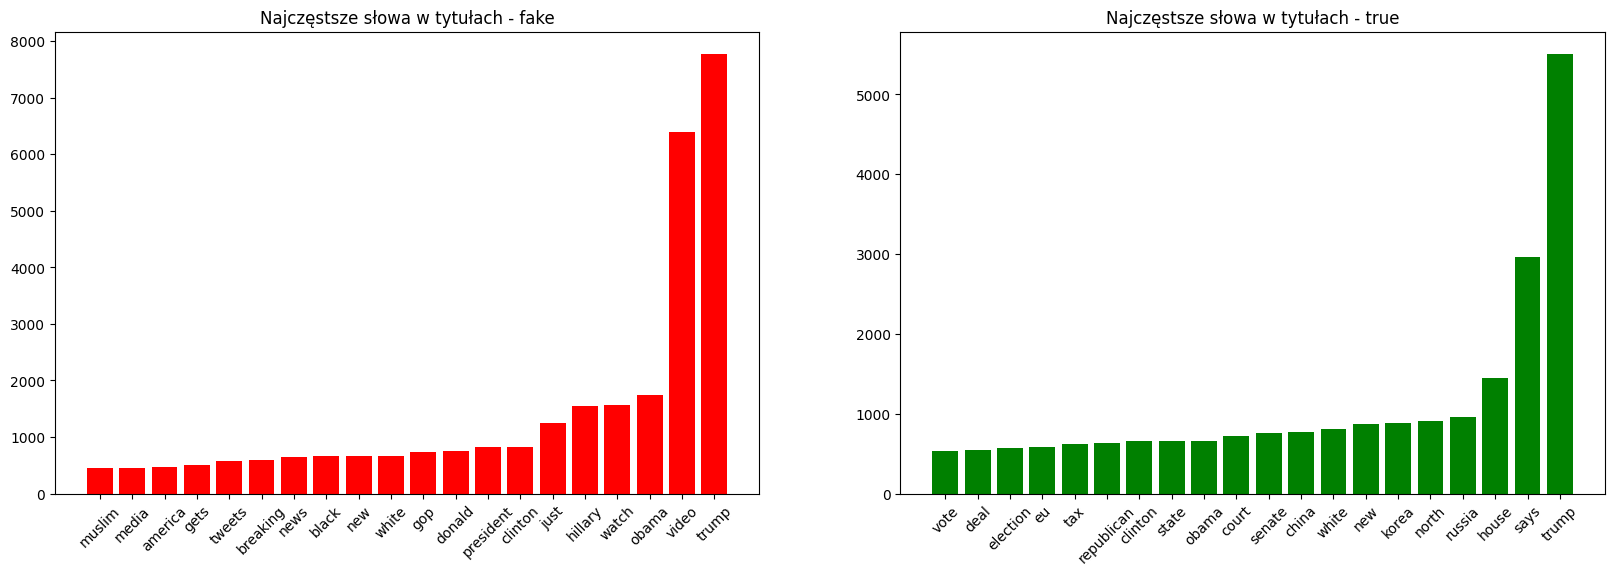

In [14]:
fake_titles = df[df['label']==1]['title']
fake_title_vectorizer = CountVectorizer(stop_words='english',max_features=20)
X_fake_title = fake_title_vectorizer.fit_transform(fake_titles)
fake_title_freq = dict(
    sorted(
        zip(fake_title_vectorizer.get_feature_names_out(), X_fake_title.sum(axis=0).A1),key = lambda x: x[1])
    )

true_titles = df[df['label']==0]['title']
true_title_vectorizer = CountVectorizer(stop_words='english',max_features=20)
X_true_title = true_title_vectorizer.fit_transform(true_titles)
true_title_freq = dict(
    sorted(
        zip(true_title_vectorizer.get_feature_names_out(), X_true_title.sum(axis=0).A1),key = lambda x: x[1]
        )
    )

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.bar(fake_title_freq.keys(), fake_title_freq.values(), color='red')
plt.title('Najczęstsze słowa w tytułach - fake')
plt.tick_params(axis='x', rotation=45)

plt.subplot(1,2,2)
plt.bar(true_title_freq.keys(), true_title_freq.values(), color='green')
plt.title('Najczęstsze słowa w tytułach - true')
plt.tick_params(axis='x', rotation=45)

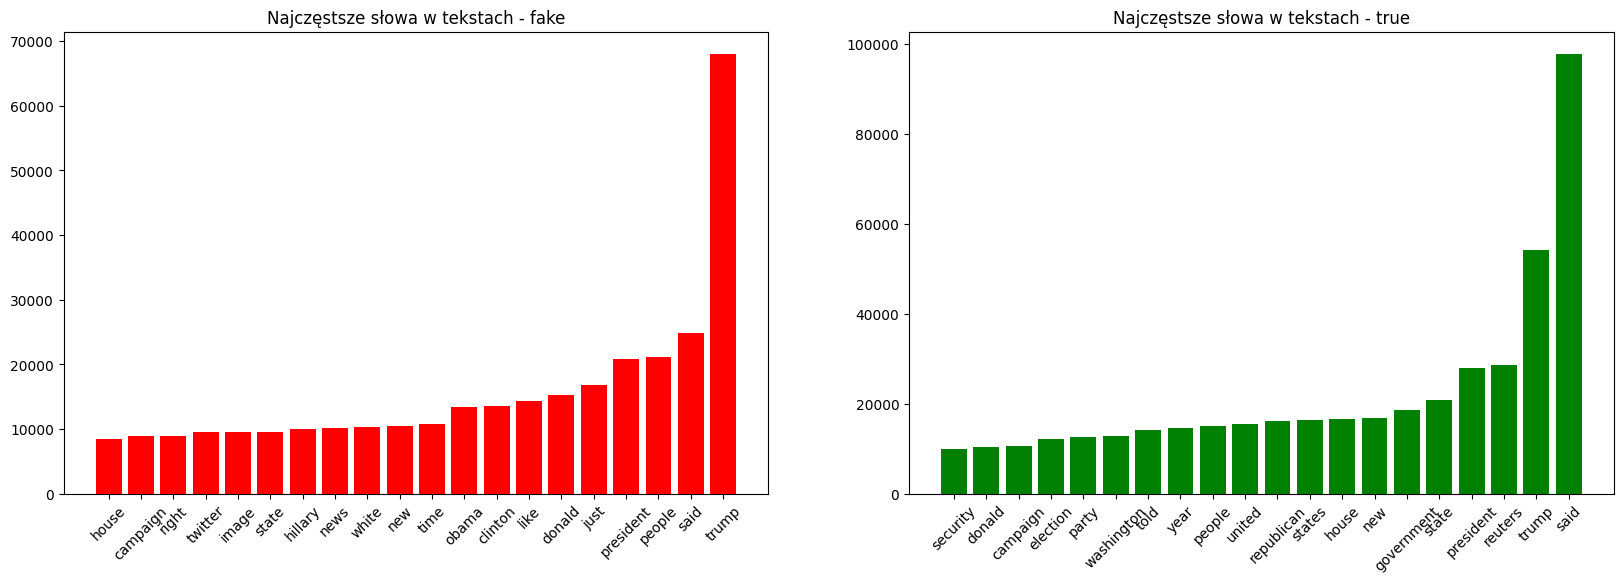

In [15]:
fake_text = df[df['label']==1]['text']
fake_text_vectorizer = CountVectorizer(stop_words='english',max_features=20)
X_fake_text = fake_text_vectorizer.fit_transform(fake_text)
fake_text_freq = dict(
    sorted(
        zip(fake_text_vectorizer.get_feature_names_out(), X_fake_text.sum(axis=0).A1),key = lambda x: x[1])
    )
true_text = df[df['label']==0]['text']
true_text_vectorizer = CountVectorizer(stop_words='english',max_features=20)
X_true_text = true_text_vectorizer.fit_transform(true_text)
true_text_freq = dict(
    sorted(
        zip(true_text_vectorizer.get_feature_names_out(), X_true_text.sum(axis=0).A1),key = lambda x: x[1]
        )
    )
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.bar(fake_text_freq.keys(), fake_text_freq.values(), color='red')
plt.title('Najczęstsze słowa w tekstach - fake')
plt.tick_params(axis='x', rotation=45)

plt.subplot(1,2,2)
plt.bar(true_text_freq.keys(), true_text_freq.values(), color='green')
plt.title('Najczęstsze słowa w tekstach - true')
plt.tick_params(axis='x', rotation=45)

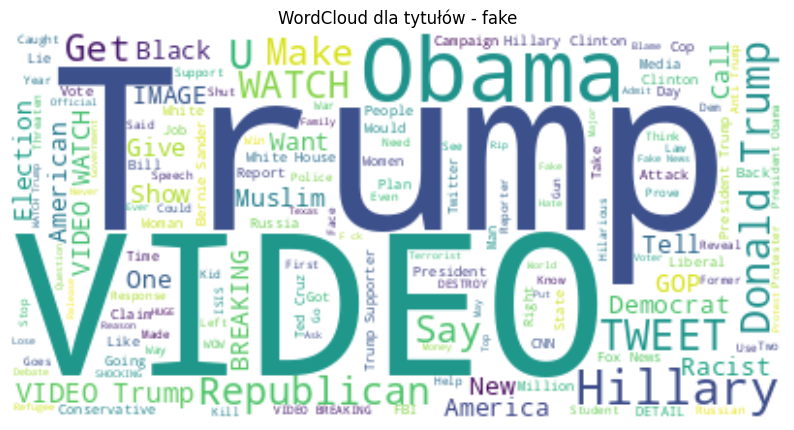

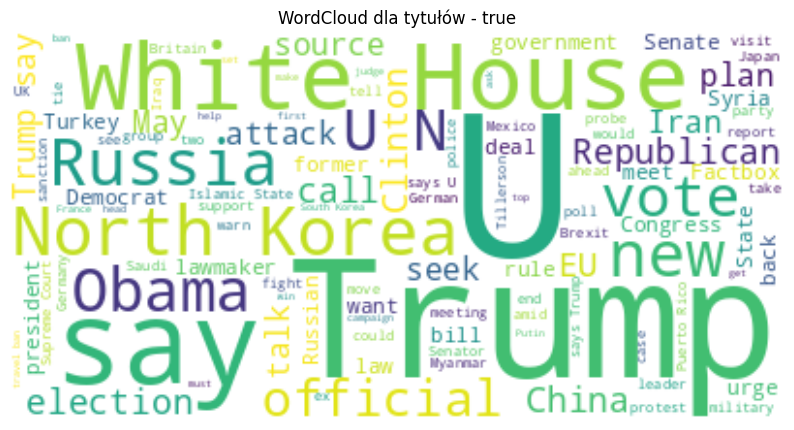

In [16]:
fake_title_text = fake_titles.str.cat(sep=' ')
wordcloud_fake_title = WordCloud(stopwords=stopwords.words('english'), background_color='white').generate(fake_title_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake_title, interpolation='bilinear')
plt.title('WordCloud dla tytułów - fake')
plt.axis('off')
plt.show()

true_title_text = true_titles.str.cat(sep=' ')
wordcloud_true_title = WordCloud(stopwords=stopwords.words('english'), background_color='white').generate(true_title_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true_title, interpolation='bilinear')
plt.title('WordCloud dla tytułów - true')
plt.axis('off')
plt.show()

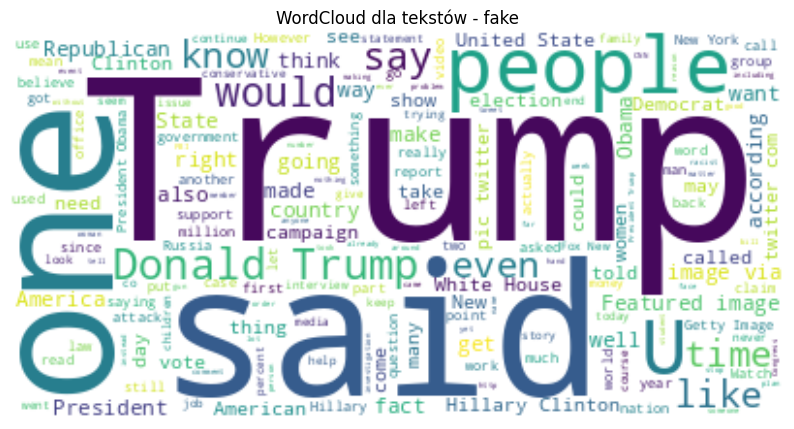

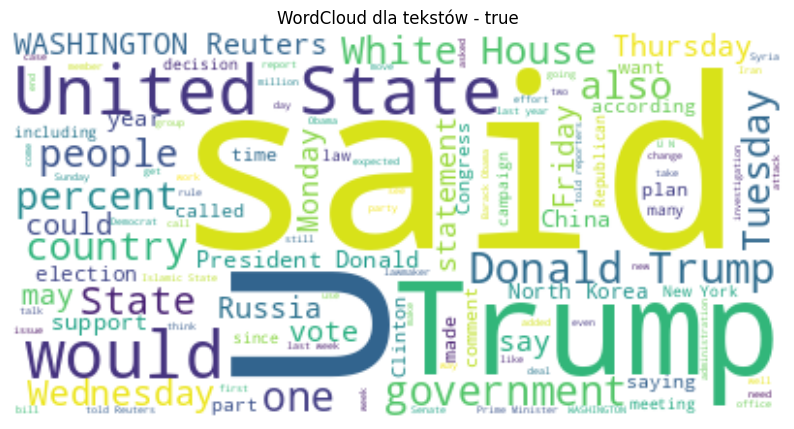

In [17]:
fake_text_text = fake_text.str.cat(sep=' ')
wordcloud_fake_text = WordCloud(stopwords=stopwords.words('english'),background_color='white').generate(fake_text_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake_text, interpolation='bilinear')
plt.title('WordCloud dla tekstów - fake')
plt.axis('off')
plt.show()

true_text_text = true_text.str.cat(sep=' ')
wordcloud_true_text = WordCloud(stopwords=stopwords.words('english'),background_color='white').generate(true_text_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true_text, interpolation='bilinear')
plt.title('WordCloud dla tekstów - true')
plt.axis('off')
plt.show()

Tytuły fake newsów i prawdziwych artykułów zawierają podobne słowa, ale w fake newsach często pojawiają się emocjonalne terminy, jak **"VIDEO", "BREAKING", "RACIST"** (widać w wordcloud dla fake news). W artykułach prawdziwych często występuje słowo **"Reuters"**, co wskazuje na wiarygodne źródło informacji.


# Analiza Czasowa

In [18]:
df['date'] = pd.to_datetime(df['date'],errors="coerce")
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

df.head()

,title,text,date,label,title_length,text_length,year,month,day,weekday
0,Many 'lost' voters say they have found their c...,WASHINGTON/NEW YORK (Reuters) - Ted Wade hasn’...,2016-01-17,0,63,6517,2016.0,1.0,17.0,6.0
1,"Iranian Revolutionary Guards commander, anothe...",BEIRUT (Reuters) - A commander in Iran s elite...,2017-11-19,0,87,2435,2017.0,11.0,19.0,6.0
2,Cambodian leader gets China's backing as West ...,PHNOM PENH (Reuters) - Cambodian Prime Ministe...,2017-09-04,0,64,3431,2017.0,9.0,4.0,0.0
3,Ex-KKK Grand Wizard: Maine Gov. Right To Call...,David Duke is perhaps one of the most notoriou...,2016-01-11,1,90,2419,2016.0,1.0,11.0,0.0
4,FINGER-WAGGING GRANNY HILLARY CLINTON Blows Up...,Hillary Clinton shows her true colors here wit...,2016-03-31,1,91,95,2016.0,3.0,31.0,3.0


In [19]:
df[['year', 'month', 'label']].groupby(by=['year', 'month']).mean()

label
year   month          
2015.0 3.0    1.000000
       4.0    1.000000
       5.0    1.000000
       6.0    1.000000
       7.0    1.000000
       8.0    1.000000
       9.0    1.000000
       10.0   1.000000
       11.0   1.000000
       12.0   1.000000
2016.0 1.0    0.786713
       2.0    0.671022
       3.0    0.645652
       4.0    0.681364
       5.0    0.679414
       6.0    0.624776
       7.0    0.678128
       8.0    0.729508
       9.0    0.678309
       10.0   0.710321
       11.0   0.538517
       12.0   0.626879
2017.0 1.0    0.517064
       2.0    0.537677
       3.0    0.539661
       4.0    0.529412
       5.0    0.553191
       6.0    0.527257
       7.0    0.508227
       8.0    0.460646
       9.0    0.129023
       10.0   0.117236
       11.0   0.107112
       12.0   0.112091
2018.0 2.0    1.000000

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

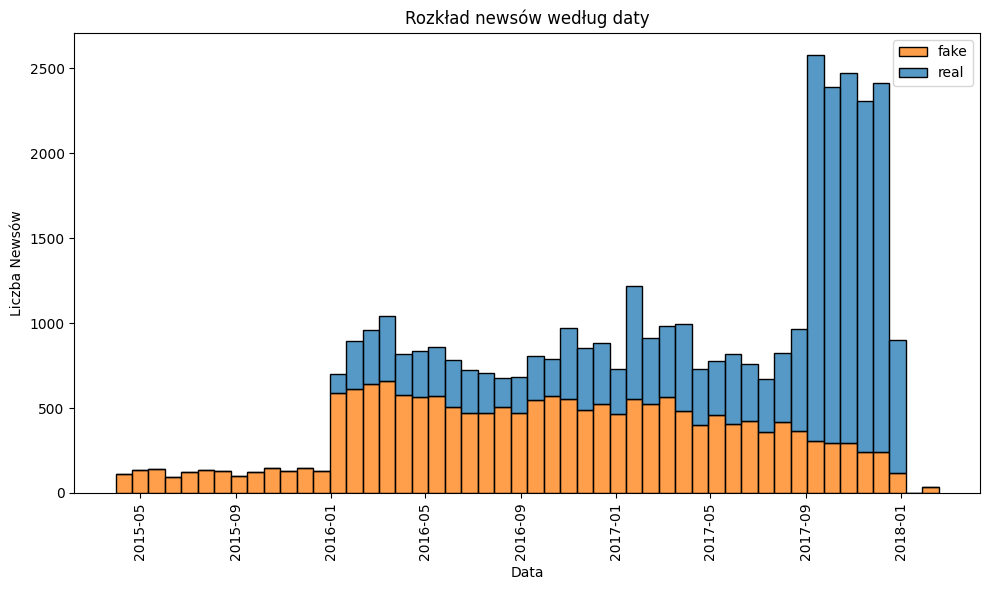

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='date', hue='label', kde=False,multiple='stack', color='salmon',bins=50)

plt.title('Rozkład newsów według daty')
plt.xlabel('Data')
plt.ylabel('Liczba Newsów')
plt.legend(['fake','real'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Sezonowość wpływa** na procent fake newsów, szczególnie w 2017 roku, gdzie widać ich spadek.
Artykuły **z 2015 i 2018 to w 100% fake newsy**, co może wprowadzić zakłócenia w pracy modelu. Rekordy z tych lat stanowią małą część zbioru danych, więć **mogą zostać usunięte** w kolejnych etapach. 
**Season** oraz **year** mogą być cennymi feature'ami.

In [21]:
df[['weekday','label']].groupby(by='weekday').mean()

,label
weekday,
0.0,0.452240
1.0,0.415020
2.0,0.399824
3.0,0.402009
4.0,0.418885
5.0,0.656557
6.0,0.625725


Najwyższy procent fake newsów występuje w **sobotę (5)** i **niedzielę (6)**, co sugeruje, że weekendy sprzyjają ich większemu rozpowszechnianiu. 

In [23]:
df[['day','label']].groupby(by='day').mean()

,label
day,
1.0,0.469068
2.0,0.484622
3.0,0.492411
4.0,0.480972
5.0,0.471774
6.0,0.437151
7.0,0.435789
8.0,0.460799
9.0,0.449128


Dzień miesiąca **nie ma wpływu** na rozprzestrzenianie fake newsów

# Analiza poziomu składni 

In [24]:
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 71.4 MB/s eta 0:00:00:00:010:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [25]:
def avg_sentence_length(text, counter):
    doc = nlp(text)
    lengths = [len([token for token in sent if not token.is_punct]) for sent in doc.sents]
    
    if counter % 1000 == 0:
        print(f"Przetworzono {counter} wierszy...")
    
    return sum(lengths)/ len(lengths) if lengths else 0

def process_with_progress(df_column):
    results = []
    for idx, text in enumerate(df_column):
        result = avg_sentence_length(text, idx)
        results.append(result)
    return results

df['avg_text_sent_length'] = process_with_progress(df['text'])
df['avg_title_sent_length'] = process_with_progress(df['title'])

df.head()

Przetworzono 0 wierszy...
Przetworzono 1000 wierszy...
Przetworzono 2000 wierszy...
Przetworzono 3000 wierszy...
Przetworzono 4000 wierszy...
Przetworzono 5000 wierszy...
Przetworzono 6000 wierszy...
Przetworzono 7000 wierszy...
Przetworzono 8000 wierszy...
Przetworzono 9000 wierszy...
Przetworzono 10000 wierszy...
Przetworzono 11000 wierszy...
Przetworzono 12000 wierszy...
Przetworzono 13000 wierszy...
Przetworzono 14000 wierszy...
Przetworzono 15000 wierszy...
Przetworzono 16000 wierszy...
Przetworzono 17000 wierszy...
Przetworzono 18000 wierszy...
Przetworzono 19000 wierszy...
Przetworzono 20000 wierszy...
Przetworzono 21000 wierszy...
Przetworzono 22000 wierszy...
Przetworzono 23000 wierszy...
Przetworzono 24000 wierszy...
Przetworzono 25000 wierszy...
Przetworzono 26000 wierszy...
Przetworzono 27000 wierszy...
Przetworzono 28000 wierszy...
Przetworzono 29000 wierszy...
Przetworzono 30000 wierszy...
Przetworzono 31000 wierszy...
Przetworzono 32000 wierszy...
Przetworzono 35000 wier

,title,text,date,label,title_length,text_length,year,month,day,weekday,avg_text_sent_length,avg_title_sent_length
0,Many 'lost' voters say they have found their c...,WASHINGTON/NEW YORK (Reuters) - Ted Wade hasn’...,2016-01-17,0,63,6517,2016.0,1.0,17.0,6.0,22.176471,11.0
1,"Iranian Revolutionary Guards commander, anothe...",BEIRUT (Reuters) - A commander in Iran s elite...,2017-11-19,0,87,2435,2017.0,11.0,19.0,6.0,25.062500,11.0
2,Cambodian leader gets China's backing as West ...,PHNOM PENH (Reuters) - Cambodian Prime Ministe...,2017-09-04,0,64,3431,2017.0,9.0,4.0,0.0,26.608696,10.0
3,Ex-KKK Grand Wizard: Maine Gov. Right To Call...,David Duke is perhaps one of the most notoriou...,2016-01-11,1,90,2419,2016.0,1.0,11.0,0.0,17.520000,9.0
4,FINGER-WAGGING GRANNY HILLARY CLINTON Blows Up...,Hillary Clinton shows her true colors here wit...,2016-03-31,1,91,95,2016.0,3.0,31.0,3.0,16.000000,14.0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

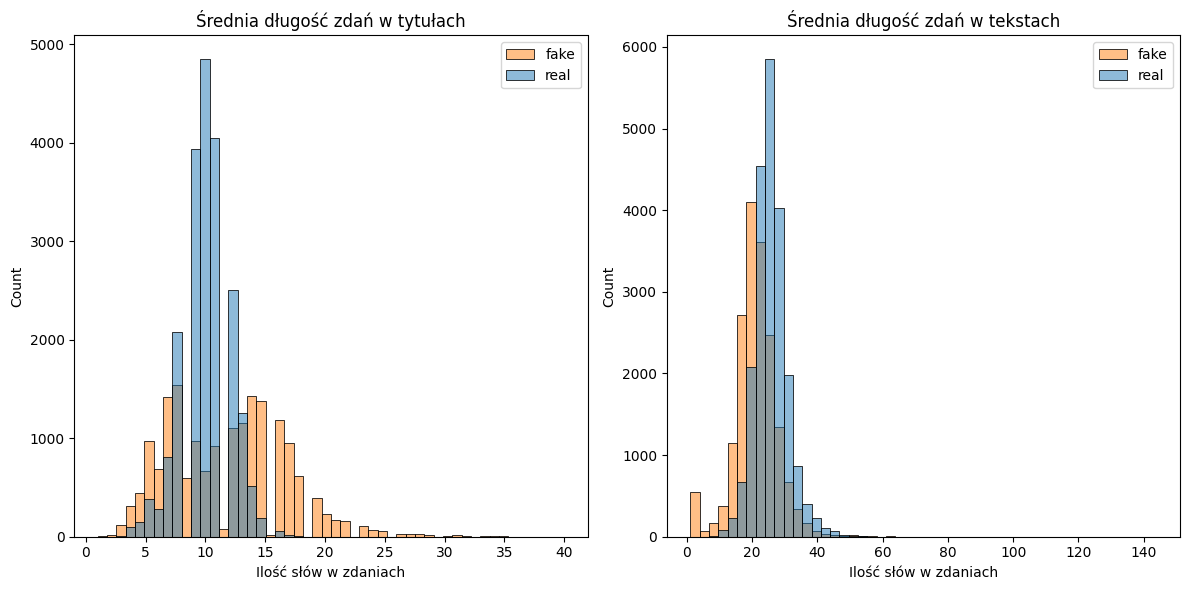

In [26]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(df,x='avg_title_sent_length', hue = 'label',bins=50)
plt.title('Średnia długość zdań w tytułach')
plt.legend(['fake','real'])
plt.xlabel('Ilość słów w zdaniach')

plt.subplot(1,2,2)
sns.histplot(df,x='avg_text_sent_length', hue = 'label',bins=50)
plt.title('Średnia długość zdań w tekstach')
plt.legend(['fake','real'])
plt.xlabel('Ilość słów w zdaniach')

plt.tight_layout()
plt.show()

**Tytuły**: W tytułach fake newsów zdania są zazwyczaj albo krótkie, albo długie, podczas gdy w artykułach prawdziwych dominują średniej długości zdania.

**Teksty**: W tekstach fake newsów dominują raczej krótsze zdania.

Długość zdań w tytułach i tekstach może stanowić cenny wskaźnik.

In [28]:
titles = df['title'].tolist()
titles_docs = list(nlp.pipe(titles))
df['title_verb_count'] = [sum(1 for token in doc if token.pos_ == 'VERB') for doc in titles_docs]
print('Gotowe - 1')
df['title_adj_count'] = [sum(1 for token in doc if token.pos_ == 'ADJ') for doc in titles_docs]
print('Gotowe - 2')

Gotowe - 1
Gotowe - 2


In [36]:
df.head(10)

,title,text,date,label,title_length,text_length,year,month,day,weekday,avg_text_sent_length,avg_title_sent_length,title_verb_count,title_adj_count
0,Many 'lost' voters say they have found their c...,WASHINGTON/NEW YORK (Reuters) - Ted Wade hasn’...,2016-01-17,0,63,6517,2016.0,1.0,17.0,6.0,22.176471,11.0,3,1
1,"Iranian Revolutionary Guards commander, anothe...",BEIRUT (Reuters) - A commander in Iran s elite...,2017-11-19,0,87,2435,2017.0,11.0,19.0,6.0,25.062500,11.0,1,1
2,Cambodian leader gets China's backing as West ...,PHNOM PENH (Reuters) - Cambodian Prime Ministe...,2017-09-04,0,64,3431,2017.0,9.0,4.0,0.0,26.608696,10.0,2,1
3,Ex-KKK Grand Wizard: Maine Gov. Right To Call...,David Duke is perhaps one of the most notoriou...,2016-01-11,1,90,2419,2016.0,1.0,11.0,0.0,17.520000,9.0,1,0
4,FINGER-WAGGING GRANNY HILLARY CLINTON Blows Up...,Hillary Clinton shows her true colors here wit...,2016-03-31,1,91,95,2016.0,3.0,31.0,3.0,16.000000,14.0,1,0
5,Joe Scarborough Defends President Obama’s Emo...,"While it s often difficult to notice, Joe Scar...",2016-01-06,1,88,4232,2016.0,1.0,6.0,2.0,15.804348,6.5,0,1
6,What Dan Rather Has To Say About Trump’s ‘Dea...,"On Tuesday afternoon, legendary journalist Dan...",2017-02-14,1,86,2387,2017.0,2.0,14.0,1.0,16.692308,16.0,2,2
7,"Republican: Porn Is Worse Than Cocaine, Gov’t...",A Republican state senator in Utah believes th...,2016-01-31,1,83,1921,2016.0,1.0,31.0,6.0,21.400000,7.5,2,2
8,"Trump, under fire on many fronts, expands camp...","WASHINGTON (Reuters) - Donald Trump, under pre...",2016-04-07,0,55,2457,2016.0,4.0,7.0,3.0,25.937500,9.0,2,1
9,FLASHBACK: NANCY PELOSI Makes Outrageous Claim...,"What a disgusting, out of touch racist she is....",2016-07-28,1,91,147,2016.0,7.0,28.0,3.0,12.000000,7.0,1,1


In [37]:
print(df[['title_verb_count','label']].groupby('label').mean())
print(df[['title_verb_count','label']].groupby('title_verb_count').mean())


       title_verb_count
label                  
0              1.511959
1              1.654568
                     label
title_verb_count          
0                 0.606830
1                 0.392487
2                 0.412718
3                 0.555795
4                 0.754354
5                 0.926531
6                 1.000000
7                 1.000000
8                 1.000000
9                 1.000000


In [34]:
print(df[['title_adj_count','label']].groupby('label').mean())
print(df[['title_adj_count','label']].groupby('title_adj_count').mean())


       title_adj_count
label                 
0             0.887484
1             0.485593
                    label
title_adj_count          
0                0.570071
1                0.380732
2                0.278473
3                0.210570
4                0.216129
5                0.321429
6                0.285714
7                0.000000


Analiza liczby czasowników i przymiotników w tytułach wskazuje, że te cechy nie mają wyraźnego wpływu na klasyfikację fake newsów. Średnia liczba czasowników (**title_verb_count**) oraz przymiotników (**title_adj_count**) w tytułach jest dość zbliżona dla obu kategorii.

In [ ]:
df.to_csv('../data/processed/new_features_news_1.csv', index=False)
print("Udało się zapisać dane")

Udało się zapisać dane
